In [ ]:
from bs4 import BeautifulSoup
from tqdm import tqdm
import requests
import pandas as pd
import time

In [ ]:
def make_table(code):

    dic = {"User-Agent" : "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_1)"}

    url = requests.get(f"https://finance.naver.com/item/sise_day.naver?code={code}&page=1", headers = dic)
    html = BeautifulSoup(url.text)

    page = int(html.find("td", class_ = 'pgRR').find("a")['href'].split("=")[-1])

    total = []
    for n in tqdm(range(1, page+1)):
        url = requests.get(f"https://finance.naver.com/item/sise_day.naver?code={code}&page={n}", headers = dic)
        html = BeautifulSoup(url.text)
        table = html.find("table")
        table = pd.read_html(str(table))[0].dropna()
        del table['전일비']
        total.append(table)
        time.sleep(0.7)

    stock = pd.concat(total, ignore_index=True)
    return stock

In [ ]:
df = make_table("005930")
df

100%|██████████| 666/666 [10:08<00:00,  1.09it/s]


,날짜,종가,시가,고가,저가,거래량
0,2023.01.05,58200.0,58200.0,58800.0,57900.0,6615658.0
1,2023.01.04,57800.0,55700.0,58000.0,55600.0,20188071.0
2,2023.01.03,55400.0,55400.0,56000.0,54500.0,13547030.0
3,2023.01.02,55500.0,55500.0,56100.0,55200.0,10031448.0
4,2022.12.29,55300.0,56000.0,56200.0,55300.0,11295935.0
...,...,...,...,...,...,...
6655,1996.06.29,68500.0,68100.0,69100.0,67100.0,96710.0
6656,1996.06.28,68100.0,67300.0,68500.0,67200.0,138430.0
6657,1996.06.27,66900.0,67500.0,67700.0,66700.0,155450.0
6658,1996.06.26,67700.0,67600.0,67900.0,66000.0,136630.0


In [ ]:
df = df.drop(0)
df

,날짜,종가,시가,고가,저가,거래량
1,2023.01.04,57800.0,55700.0,58000.0,55600.0,20188071.0
2,2023.01.03,55400.0,55400.0,56000.0,54500.0,13547030.0
3,2023.01.02,55500.0,55500.0,56100.0,55200.0,10031448.0
4,2022.12.29,55300.0,56000.0,56200.0,55300.0,11295935.0
5,2022.12.28,56600.0,57600.0,57600.0,56400.0,14665410.0
...,...,...,...,...,...,...
6655,1996.06.29,68500.0,68100.0,69100.0,67100.0,96710.0
6656,1996.06.28,68100.0,67300.0,68500.0,67200.0,138430.0
6657,1996.06.27,66900.0,67500.0,67700.0,66700.0,155450.0
6658,1996.06.26,67700.0,67600.0,67900.0,66000.0,136630.0


In [ ]:
df2 = df.copy()
df2 = df2[::-1]
df2 = df2.reset_index(drop=True)
df2['날짜'] = pd.to_datetime(df2['날짜'], format = '%Y.%m.%d')
df2

,날짜,종가,시가,고가,저가,거래량
0,1996-06-25,67500.0,66500.0,68300.0,65600.0,112960.0
1,1996-06-26,67700.0,67600.0,67900.0,66000.0,136630.0
2,1996-06-27,66900.0,67500.0,67700.0,66700.0,155450.0
3,1996-06-28,68100.0,67300.0,68500.0,67200.0,138430.0
4,1996-06-29,68500.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...,...
6654,2022-12-28,56600.0,57600.0,57600.0,56400.0,14665410.0
6655,2022-12-29,55300.0,56000.0,56200.0,55300.0,11295935.0
6656,2023-01-02,55500.0,55500.0,56100.0,55200.0,10031448.0
6657,2023-01-03,55400.0,55400.0,56000.0,54500.0,13547030.0


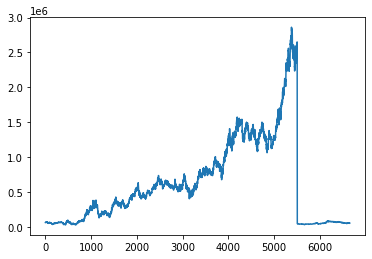

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df2['종가'])